In [1]:
from bertopic import BERTopic
import MyLib.nlp as nlp

%load_ext autoreload
%autoreload 2

In [19]:
Today="2023-05-31 "

In [2]:
import pandas as pd
df=pd.read_json("2023-05-15_Zotero_AI_nlp_en.json")

In [20]:
df.to_excel(Today+"data_8Topics.xlsx")

In [39]:
# text_clean --> only ChatGPT paragraphs

0      Based on two introductory presentations by Pro...
1      Since the release of ChatGPT in November , Art...
2      During the symposium there will be a vernissag...
3      Keynote: Studenten facing AI Ioana Jivet (Goet...
4      Jivet points out in her keynote that in practi...
                             ...                        
608    What does ChatGPT mean for your education and ...
609    he UvA is embracing the use of Artificial Inte...
610    It is important for you to use AI in a respons...
611    Unless your lecturer explicitly states otherwi...
612    If you have any questions about the use of AI ...
Name: text_clean, Length: 613, dtype: object

In [3]:

import MyLib.analysis as analysis 

from ipywidgets import interactive, interact
#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="sustainable",words_before=(0,10),words_after=(0,10))
def text_context(column=["text_clean","pure_text","NoStopwords"],search_word="sustainable",words_before=1,words_after=1):
    df[column].dropna().apply(analysis.Keyword_context,search_word=search_word.lower(),context=(words_before,words_after))


interactive(children=(Dropdown(description='column', options=('text_clean', 'pure_text', 'NoStopwords'), value…

In [4]:
FilterList=["eur","vrije","universiteit","ischen", "dijck","amsterdam","vu","stefan","hubers"]

df.NoStopwords=df.NoStopwords.apply(lambda x: [i for i in x if (i not in(FilterList))])

In [7]:
df["NoStop"]=df.NoStopwords.apply(lambda x: " ".join(x))

In [8]:
df['dt']=df['date'].astype(str)
df=df[df['dt'].isnull()==False]
articles = df.NoStop.to_list()
timestamp = df.date.to_list()

In [16]:
topic_model = BERTopic(language="english", nr_topics=8)
topics, probs = topic_model.fit_transform(articles)

df2=df.join(topic_model.get_document_info(0))


# Protocol: I played arroutn with the topic number: 
- 12 only gives 2 topics
- 11 seems promissing. Dimension reduction viszalizations shows big overlaps of these topics
- 8 gives meaningful looking topics


In [72]:
#topic_model.set_topic_labels(my_custom_labels)

In [17]:
topic_model.visualize_barchart(top_n_topics=8,n_words=10,height=300)

In [29]:

Topic_Names_8={"Topic 0": "AI in Education", 
             "Topic 1": "Understangin AI", 
             "Topic 2": "bias risk", 
             "Topic 3": "Text simulators", 
             "Topic 4": "Researching AI",
             "Topic 5": "AI regulation",
             "Topic 6": "Societal disruption"}



Topic_Names_11={"Topic 0": "", 
             "Topic 1": "Make GPT useful", 
             "Topic 2": "Workshops on AI", 
             "Topic 3": "AI in Education", 
             "Topic 4": "AI regulation",
             "Topic 5": "AI & democracy",
             "Topic 6": ""}

In [18]:
topic_model.visualize_topics()

In [14]:
topic_model.visualize_heatmap()

In [41]:
df2[df2.Topic==2].Uni

417     Maastricht Univerisity
419     Maastricht Univerisity
435     Maastricht Univerisity
604    University of Amsterdam
605    University of Amsterdam
                ...           
587    University of Amsterdam
594    University of Amsterdam
598    University of Amsterdam
599    University of Amsterdam
601    University of Amsterdam
Name: Uni, Length: 62, dtype: object

In [28]:
pd.set_option('display.max_colwidth', 200)
df2[df2.Topic==5].text_clean

105    his session is part of the DevelopMEvent external link taking place from to April.Have you always wanted to experiment with ChatGPT? Or are you getting excited and want to know more about what it ...
286                                  In the second part of the th edition of TAISIG Talks, dr. David Peeters discusses virtual reality as a tool in the study of the psychology of language and communication.
446    ChatGPTs rapid virality sparks both enthusiasm for using the product and concerns about consumer protection. Protecting consumers in the age of AI was also a central topic at the AI-Assisted consu...
478    hat makes this whole story quite precarious. Suddenly there is a chat technology that works better than anything else, but is also susceptible to misinformation. Now the responsibility rests on th...
546    Carolin Ischen is a PhD candidate at the Persuasive Communication group and the Digital Communication Methods Lab of the Communication Science department at the Univ

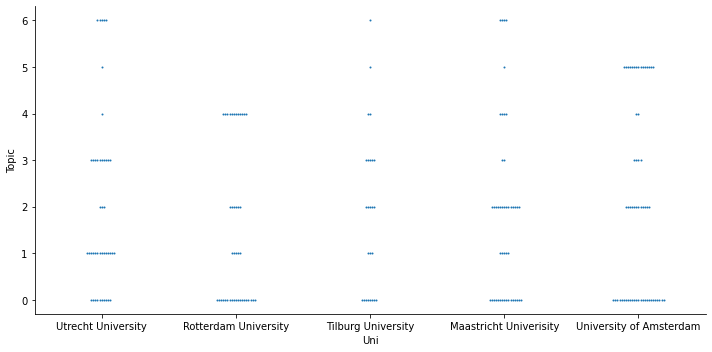

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns




selected_Unis=df2.value_counts("Uni")[:5].keys().to_list()

dfx=df2[df2.Uni.apply(lambda x: x in selected_Unis)]
dfx=dfx[dfx.Topic!=-1]
ax = sns.catplot(data=dfx, x="Uni", y="Topic", aspect=2, size=2, orient="v", kind="swarm")

In [30]:
df2["dt"]=df2['date'].dt.strftime('%Y-%m')
df2=df2.sort_values("date")
df2.dt

366    2010-01
367    2010-01
544    2019-07
543    2019-07
542    2019-07
        ...   
599        NaN
600        NaN
601        NaN
602        NaN
603        NaN
Name: dt, Length: 613, dtype: object

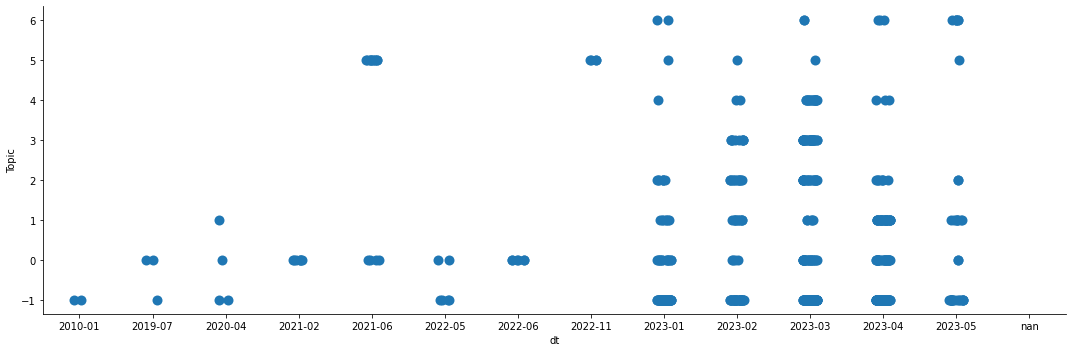

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns


ax = sns.catplot(data=df2, x="dt", y="Topic", aspect=3, size=10)




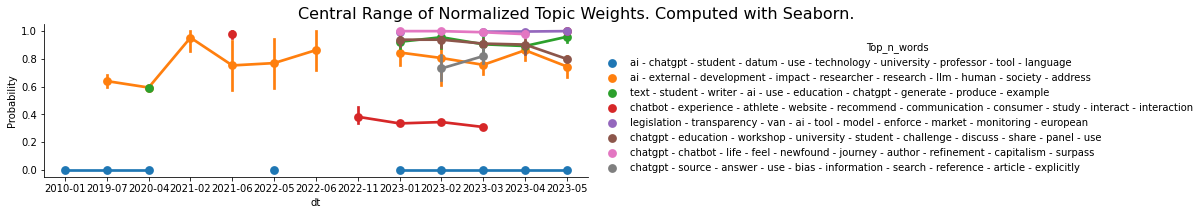

In [33]:

def create_pointplot(df, y_value, hue=None, col=None, wrap=None, size=5, aspect=1.5, title=""):
    p = sns.catplot(x="dt", y=y_value, kind='point', height=size, hue=hue, 
                       col=col, col_wrap=wrap, aspect=aspect, data=df2)
    p.fig.subplots_adjust(top=0.9)
    p.fig.suptitle(title, fontsize=16)
    return p



create_pointplot(df2, 'Probability', aspect=3, hue='Top_n_words',size=3,
                 title="Central Range of Normalized Topic Weights. Computed with Seaborn.")


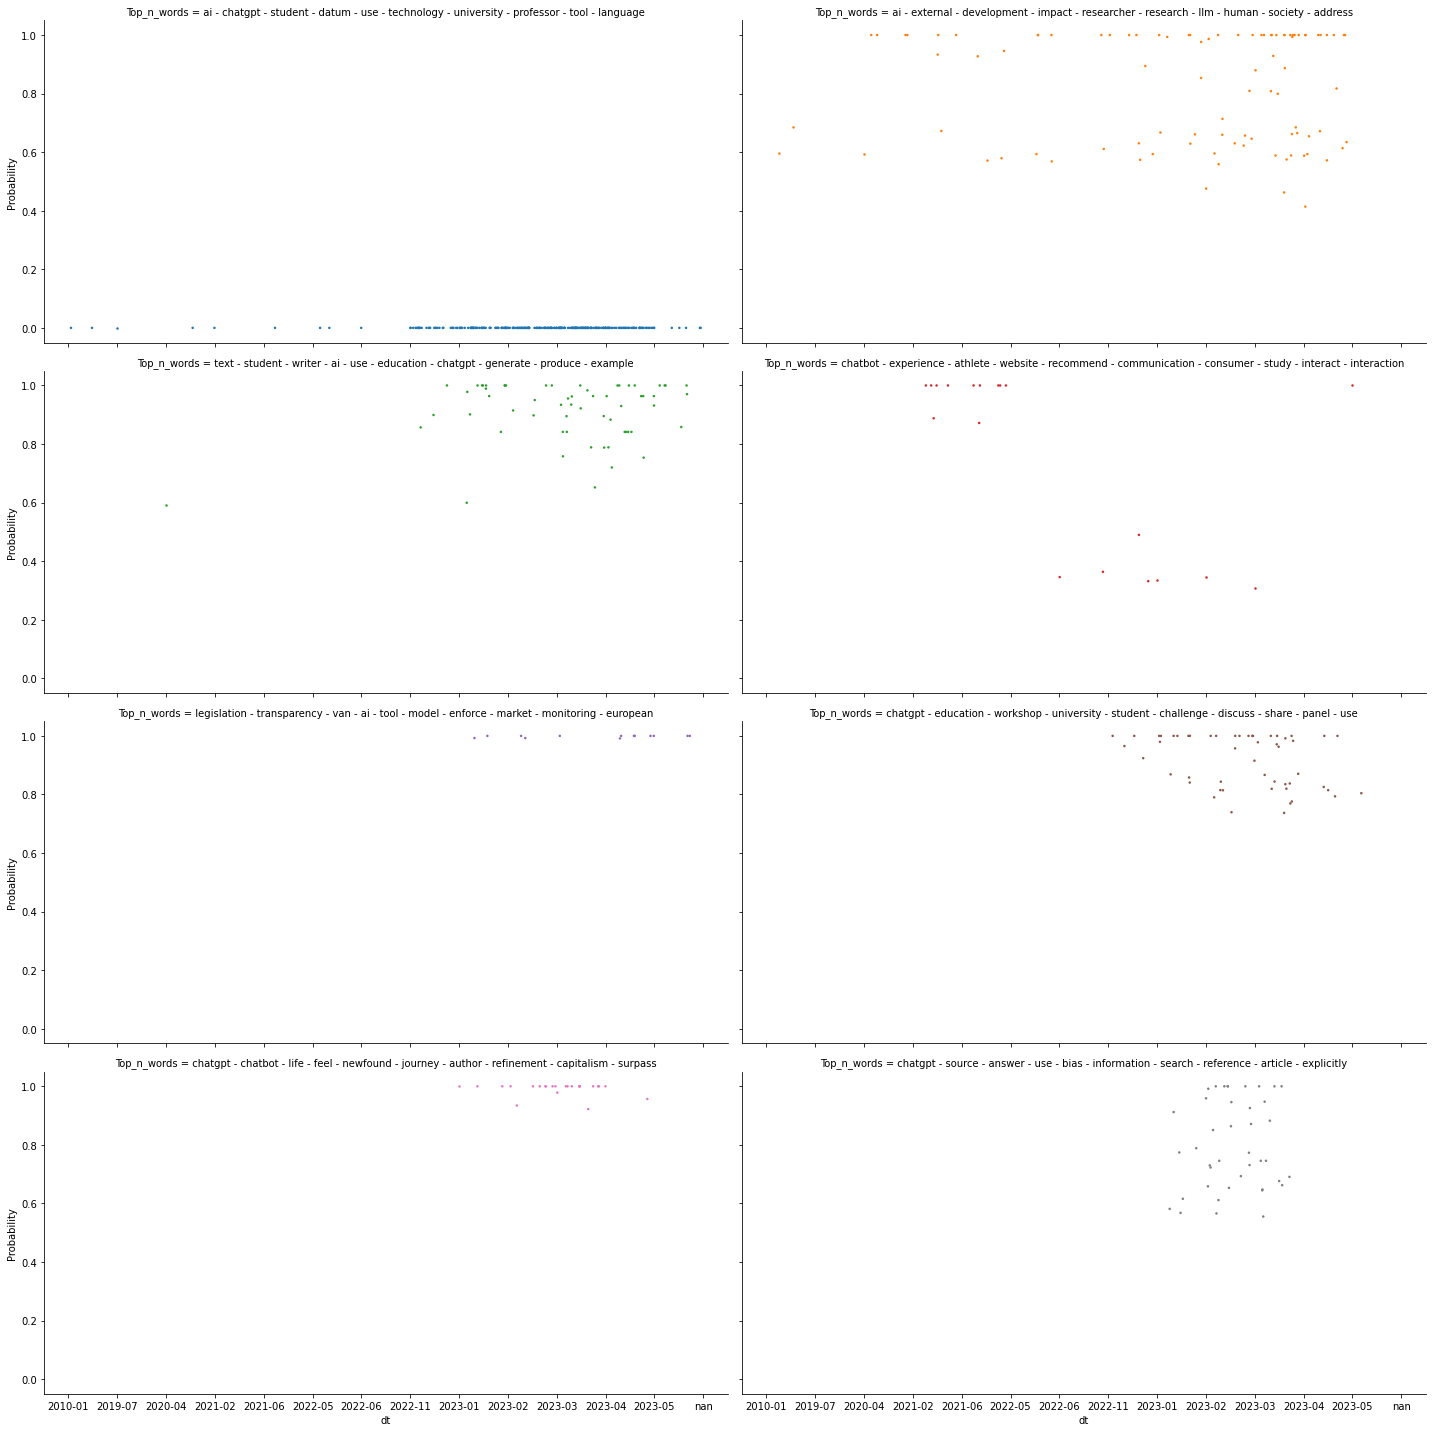

In [34]:
p = sns.catplot(x="dt", y='Probability', hue="Top_n_words", col='Top_n_words', col_wrap=2, 
                   kind='strip', size=2.5, aspect=2, jitter=1, data=df2)

In [37]:
df2.columns

Index(['Uni', 'FileKey', 'url', 'file', 'date', 'Title', 'h1', 'h2', 'text',
       'linkName', 'linkUrl', 'AI_paragraphs', 'LEN', 'text_clean',
       'letters_count', 'word_count', 'language', 'source_language',
       'pure_text', 'Lemmata', 'NoStopwords', 'dt', 'NoStop', 'Document',
       'Topic', 'Name', 'Top_n_words', 'Probability',
       'Representative_document'],
      dtype='object')

In [38]:
documents_per_topic = df2.groupby(['Topic'], as_index=False).agg({'text_clean': ' '.join})

In [39]:
documents_per_topic

,Topic,text_clean
0,-1,Artificial intelligence is any artificial creation of human-like intelligence programmed to perform equally or better than humans on specific tasks. Popular AI applications today include speech re...
1,0,"Seven interdisciplinary, innovative projects are launched to investigate the societal implications of AI. Highlighting the breadth and the depth of AI research at the University of Amsterdam, thes..."
2,1,"Balance In order to give students grades that reliably represent how well they master the learning objectives (LOs) of a course, we must: Assess these learning objectives (and nothing more). Make ..."
3,2,EDLunch: What might ChatGPT mean for UM education? - Events - Maastricht University What might ChatGPT mean for PBL education at Maastricht University? Join our EDLunch for an informal discussion ...
4,3,"Note that this news article is published on February . Journals are currently updating their editorial policies. If you've used ChatGPT in any way in the writing process, you should double-check t..."
5,4,"eachers are puzzled by the arrival of ChatGPT, a chatbot that quickly generates texts and answers questions. Legal questions also arise. For example, what about copyright, and what rules apply whe..."
6,5,Carolin Ischen is a PhD candidate at the Persuasive Communication group and the Digital Communication Methods Lab of the Communication Science department at the University of Amsterdam. She studie...
7,6,"he second talk was presented by dr. Patricia Prfer, Head of the Data Science Unit at CentERdata. Together with her team, Patricia conducts research on skill-based job transitions. Technological ad..."
